
## Common half life


- TV — 2–6 weeks half life

- Radio — 1–5 weeks half life

- Newspaper — 2–3 weeks half life

- Print magazines — 4–8 weeks half life

- Online (upper funnel) — 2–4 weeks half life

- Online (lower funnel) — 1–2 weeks half life


### References 

- https://medium.com/@Marko_Mi/advertising-adstock-theory-85cc9e26ea0e

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Geometric Adstock
------------------

 $$A(t) = A(t) + \lambda * A(t-1)$$


The half-life in the context of the adstock formulation is the time it takes for the adstock to decay to half of its value in the absence of new advertising expenditure. In this particular case we have

$$A(t_{1/2}) = 0 + \lambda* A(t_{1/2}-1)$$
$$A(t_{1/2}) = \lambda * A(t_{1/2}-1)$$

which in that case become a geometric sequence for which we know the general form 
$${\displaystyle a_{n}=a_{m}\,r^{n-m}.}$$

Therefore 
$$A(t_{1/2}) = A_{0} * \lambda ^{t_{1/2}-0}$$
$$A(t_{1/2}) = A_{0} * \lambda ^{t_{1/2}}$$

But we remember that we know at $t_{1/2}$,  $A (t_{1/2}) = \frac{A_0}{2}$


Therefore we then have the equation 

$$\frac{A_0}{2} = A_{0} * \lambda^{t_{1/2}}$$
Rearranging to solve for the half-life:

$$\frac{1}{2} = \lambda^{t_{1/2}}$$

$$ t_{1/2} = \frac{\log(0.5)}{\log(\lambda)}$$


It is very comon that marketers communicate halflife we get: 

$$  \lambda = 0.5^{t_{1/2}}$$

## Visualizing HALF-Life

In [5]:
def calculate_decay_rate(half_life):
    return 0.5 ** (1 / half_life)


def calculate_half_life(decay_factor):
    return np.log(0.5) / np.log(decay_factor)



print(calculate_decay_rate(2))

print(calculate_half_life(0.7))

0.7071067811865476
1.9433582098747315


> For a half-life of 2 time units, the decay rate $lambda$ is approximately 0.7.

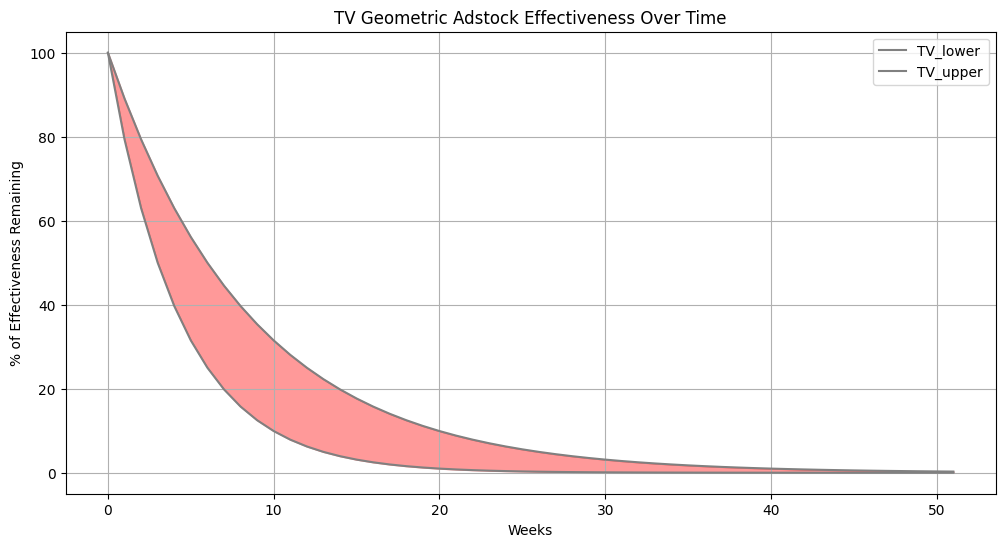

In [7]:

def adstock_effectiveness(initial_effectiveness, decay_rate, periods):
    effectiveness = [initial_effectiveness]
    for _ in range(1, periods):
        effectiveness.append(effectiveness[-1] * decay_rate)
    return np.array(effectiveness)



def plot_adstock_effect(initial_effectiveness = 100,periods=52):
    
    
    half_lives = {
        # 'Digital Display': 2.2, 
        #           'Digital OLV': 0.5, 
                  # 'TV': 2, 
                'TV_lower': 3, 
                  "TV_upper" :6,
                  # 'Paid Search': 0.5
                 }
    
    colors = {
        # 'Digital Display': 'purple', 
        #       'Digital OLV': 'orange', 
        #       'Social': 'black', 
              'TV_upper': 'grey',
              'TV_lower': 'grey'
    }
    
    weeks = range(periods)
    plt.figure(figsize=(12, 6))
    array_effectiveness = []
    for channel, half_life in half_lives.items():
        decay_rate = calculate_decay_rate(half_life)
        effectiveness = adstock_effectiveness(initial_effectiveness, decay_rate, periods)
        array_effectiveness.append(effectiveness)
        plt.plot(weeks, effectiveness, label=channel, color=colors[channel])
    
    plt.fill_between(weeks, 
                     array_effectiveness[0], 
                     array_effectiveness[1], 
                     color='red', alpha=0.4)
    plt.xlabel('Weeks')
    plt.ylabel('% of Effectiveness Remaining')
    plt.title('TV Geometric Adstock Effectiveness Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_adstock_effect()

In [ ]:
initial_effectiveness = 100
periods = 10
_rates = [0.1,0.3,0.5,0.8]
weeks = range(periods)
colors = ['#fab1a0','#6c5ce7','#55efc4','#e84393']
plt.figure(figsize=(12, 6))

for decay_rate,_c in zip(_rates,colors):
    effectiveness = adstock_effectiveness(initial_effectiveness, decay_rate, periods)
    plt.plot(weeks, effectiveness, label=f'adstock: {decay_rate}', color=_c)
plt.title('Geometric Adstock decay')
plt.ylabel('Marketing impact (%)')
plt.xlabel('Time unit [weeks]')
plt.legend()
plt.grid(True)


## Marketing Use case 

In [52]:
def geometric_adstock(ad_spend, decay_rate):
    # Initialize an array to store the adstock values
    adstock = np.zeros(len(ad_spend))
    
    # Compute the adstock value for each week
    for week in range(len(ad_spend)):
        if week == 0:
            adstock[week] = ad_spend[week]  # The first week has no previous adstock
        else:
            # Calculate the adstock value considering the decay from the previous week
            adstock[week] = ad_spend[week] + decay_rate * adstock[week - 1]
    
    return adstock

52

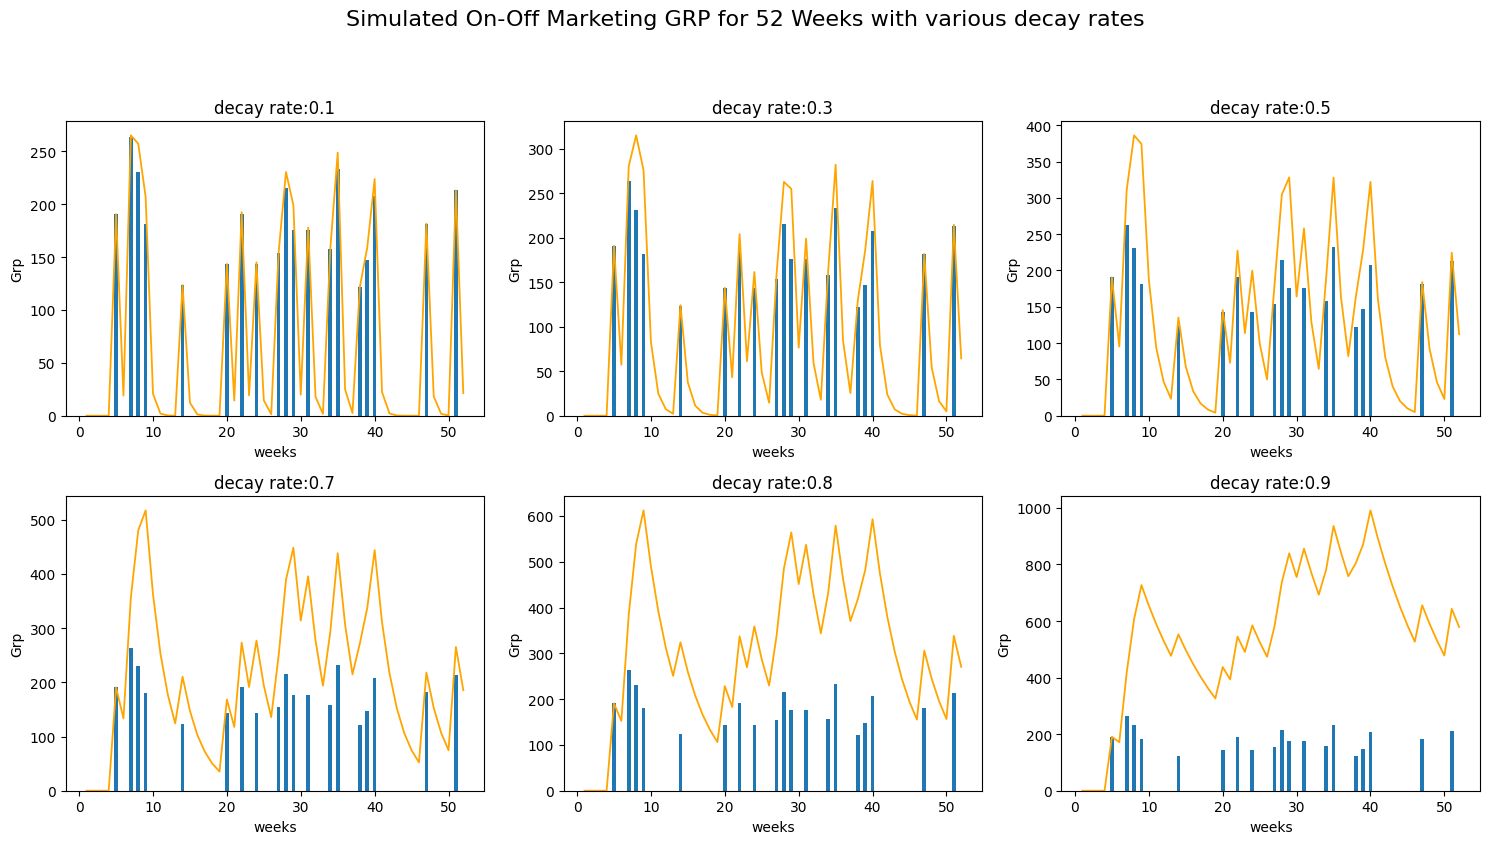

In [91]:
np.random.seed(42)


grp_values = np.random.normal(200, 40, weeks)  

on_off =  np.random.randint(0, 2, weeks)  



# Plotting the simulation
# plt.stem(marketing_on_off * grp_values, basefmt=" ")



fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for ax, decay in zip(axes.flatten(), [0.1,0.3,0.5,0.7,0.8,0.9]):
    adstock_grp = geometric_adstock(grp_values * on_off,decay_rate=decay)
    # w_eeks = [ 'w_'+str(e) for e in range(1,weeks+1)]
    w_eeks = range(1,weeks+1)
    ax.bar( w_eeks,height = grp_values * on_off, width=0.5 )
    ax.plot( w_eeks, adstock_grp,lw=1.3,color='orange',
            # label=f'decay rate :{decay}'
           )
    ax.set_title(f'decay rate:{decay}')
    ax.set_xlabel('weeks')
    ax.set_ylabel('Grp')
    # ax.set_xticks(ticks='',rotation=90)  # Rotating x-axis labels for better visibility
    # ax.legend()
    ax.grid(False)

plt.suptitle('Simulated On-Off Marketing GRP for 52 Weeks with various decay rates', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()



In [20]:
grp_values

array([162.15266769, 202.95389826, 228.90245602, 225.60637726,
       262.18227828, 188.45026333, 162.31205574, 240.10814354,
       199.35703023, 214.54503359, 179.46876957, 184.36663265,
       171.60598159, 168.3115332 , 189.76008597, 175.21526882,
       154.63902582, 185.40779445, 199.63578756, 137.22191682,
       210.76214915, 164.37954265, 228.87338033, 252.38678795,
       234.69803754, 284.87219177, 147.21748583, 179.63429203,
       152.11007354, 218.1711154 , 266.98211413, 194.09034997,
       163.90727053, 153.95656793, 285.19142299, 178.52678324,
       249.40145915, 146.16316472, 190.20215137, 169.44651111,
       232.24574359, 165.82261732, 262.42767982, 173.67661163,
       158.99017746, 175.42944106, 208.81486564, 188.9035029 ,
       231.18219647, 211.43030081, 187.36299226, 249.06701984])

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0])